In [1]:
#mnist의 숫자 인식 샘플에 대한 예제
#keras-1.2.2
#theano-0.8.2
#matplotlib-1.5.1

from keras.datasets import mnist 
from keras.utils import np_utils

# 이미지의 x,y 크기는 28,28이며, 최종적으로 구분할 클래스는 0~9의 10종류임을 선언
img_rows, img_cols = 28, 28
nb_classes = 10

# 다음 라인을 처음 실행하면 minst dataset을 다운로드합니다.
#X_train은 (60000, 28, 28) 형태의 매트릭스로서 6만개의 숫자 이미지이다.
#y_train은 위의 6만개에 대한 해답이다.
#X_test는 (10000,28,28) 형태의 매트릭스로서 테스트할 1만개의 숫자이미지이다.
#y_test는 그에 대한 해답이다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#돌리는 시간이 너무 오래걸리므로 샘플 수를 좀 줄이자.
X_train = X_train[:3000]
y_train = y_train[:3000]
X_test = X_test[:500]
y_test = y_test[:500]

Using Theano backend.
1 #define _CUDA_NDARRAY_C
2 
3 #include <Python.h>
4 #include <structmember.h>
5 #include "theano_mod_helper.h"
6 
7 #include <numpy/arrayobject.h>
8 #include <iostream>
9 
10 #include "cuda_ndarray.cuh"
11 
12 #ifndef CNMEM_DLLEXPORT
13 #define CNMEM_DLLEXPORT
14 #endif
15 
16 #include "cnmem.h"
17 #include "cnmem.cpp"
18 
19 //If true, when there is a gpu malloc or free error, we print the size of allocated memory on the device.
20 #define COMPUTE_GPU_MEM_USED 0
21 
22 //If true, we fill with NAN allocated device memory.
23 #define ALLOC_MEMSET 0
24 
25 //If true, we print out when we free a device pointer, uninitialize a
26 //CudaNdarray, or allocate a device pointer
27 #define PRINT_FREE_MALLOC 0
28 
29 //If true, we do error checking at the start of functions, to make sure there
30 //is not a pre-existing error when the function is called.
31 //You probably need to set the environment variable
32 //CUDA_LAUNCH_BLOCKING=1, and/or modify the CNDA_THREAD_SYNC
33

nvcc warning : The 'compute_20', 'sm_20', and 'sm_21' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).

['nvcc', '-shared', '-O3', '-Lc:\\Users\\smilemango\\Anaconda3\\envs\\py34\\libs\\', '--compiler-bindir', 'c:\\Program Files (x86)\\Microsoft Visual Studio 14.0\\VC\\bin\\', '-Xlinker', '/DEBUG', '-D HAVE_ROUND', '-m64', '-Xcompiler', '-D_FORCE_INLINES,-DCUDA_NDARRAY_CUH=mc72d035fdf91890f3b36710688069b2e,-DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION,/Zi,/MD', '-IC:\\Users\\smilemango\\Anaconda3\\envs\\py34\\lib\\site-packages\\theano\\sandbox\\cuda', '-IC:\\Users\\smilemango\\Anaconda3\\envs\\py34\\lib\\site-packages\\numpy\\core\\include', '-IC:\\Users\\smilemango\\Anaconda3\\envs\\py34\\include', '-IC:\\Users\\smilemango\\Anaconda3\\envs\\py34\\lib\\site-packages\\theano\\gof', '-o', 'C:\\Users\\smilemango\\AppData\\Local\\Theano\\compiledir_Windows-10-10.0.14393-Intel64_Family_6_Model_60_Stepping_3_GenuineInt

In [2]:
#X_train의 형태는 (n, 28,28)인데 이를 (n,1,28,28)로 바꿔준다. 후에 Convolution을 처리해주면서 레이어가 늘어나기 때문에
#그에 따라 형태를 조정해준다.
X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)

#숫자를 표현하는 이미지는 흰색의 진하기에 따라서 0~255까지의 값을 갖는다.
#스케일링은 자료 집합에 적용되는 전처리 과정으로 모든 자료에 
#다음과 같은 선형 변환을 적용하여 전체 자료의 분포를 평균 0, 분산 1이 되도록 만드는 과정이다.
#스케일링은 자료의 overflow나 underflow를 방지하고 독립 변수의 공분산 행렬의 condition number 를 
#감소시켜 최적화 과정에서의 안정성 및 수렴 속도를 향상시킨다.
#그러나 mnist의 데이터는 단순하므로 255 로 나눠주는 것으로 충분하다. 
#자세한 것은 Scikit-Learn 참고
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train shape: (3000, 1, 28, 28)
3000 train samples
500 test samples


answer [5]
answer [0]
answer [4]


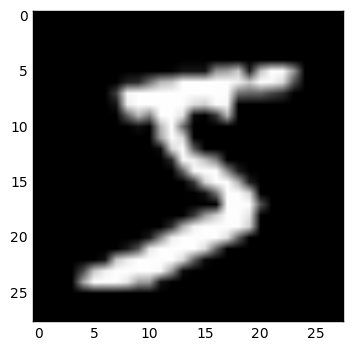

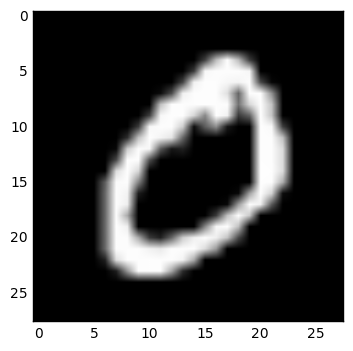

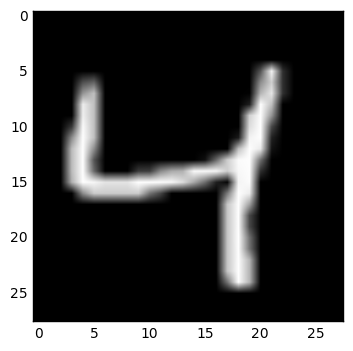

In [3]:
%matplotlib inline

from IPython.display import Image 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import numpy as np

for idx in range(0,3):
    print('answer', np.where(Y_train[idx]==1.0)[0])
    plt.figure()
    plt.imshow(X_train[idx][0], cmap=cm.Greys_r)

In [4]:
# Author: Hussein Al-barazanchi
# reading and saving the data are based on the code
# from the following link 
# http://www.kaggle.com/users/9028/danb/digit-recognizer/convolutional-nn-in-python

# import numpy and pandas for array manipulationa and csv files
import numpy as np
import pandas as pd


# import keras necessary classes
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD

# Creating the model which consists of 3 conv layers followed by
# 2 fully conntected layers
print('creating the model')

# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(1, img_rows, img_cols)))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

creating the model


In [5]:
# 한번 이 코드를 돌려보세요. 너무 오래 걸린다면, 다음의 코드 블락을 살펴보고 GPU를 이용하면 얼마나 빠른지 눈으로 확인하세요
batch_size = 128
nb_epoch = 3

model.fit(X_train, Y_train, nb_epoch=nb_epoch, batch_size=batch_size, validation_split=0.1)

Train on 2700 samples, validate on 300 samples
Epoch 1/3
2700/2700 [==============================] - 44s - loss: 1.6652 - acc: 0.4589 - val_loss: 1.0164 - val_acc: 0.6267

In [6]:
# 모델 저장하기
json_string = model.to_json()
open('cnn_mnist.json', 'w').write(json_string)

2358

In [7]:
# 훈련 결과 (Weight) 저장하기
model.save_weights('cnn_mnist.h5')

In [8]:
# 모델 불러오기
from keras.models import model_from_json
model = model_from_json(open('cnn_mnist.json').read())

In [9]:
# 훈련결과 (Weight) 불러오기
model.load_weights('cnn_mnist.h5')

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
score = model.evaluate(X_test, Y_test, verbose=False)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.556311263084
Test accuracy: 0.769999999523


In [14]:
# 아래의 코드는 예측한 값을 파일로 저장합니다.
preds = model.predict_classes(X_test, verbose=0)

def write_preds(preds, fname):
    pd.DataFrame({"ImageId": list(range(1,len(preds)+1)), "Label": preds}).to_csv(fname, index=False, header=True)

print('Saving predictions')
write_preds(preds, "keras-mlp.csv")

Saving predictions


prediction: 4  real answer: 9
prediction: 4  real answer: 5
prediction: 3  real answer: 5
prediction: 4  real answer: 9


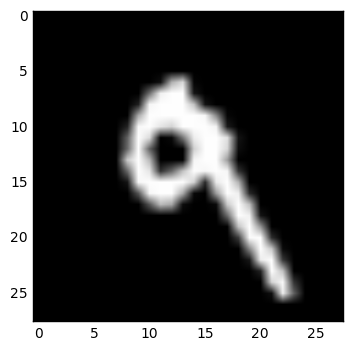

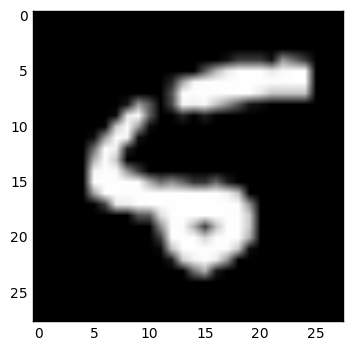

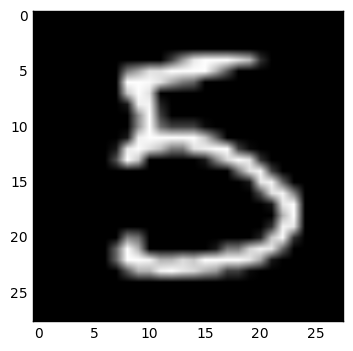

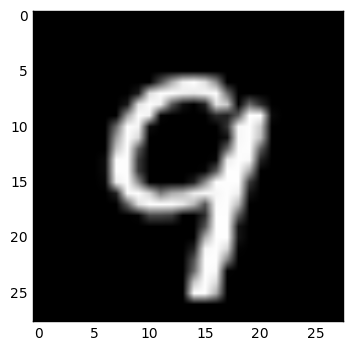

In [16]:
%matplotlib inline

from IPython.display import Image 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm

comp_result = np.equal(preds,y_test)
locs = np.where(comp_result==False)[0].tolist() # Find wrong answer positions


# 틀린 결과가 많으니 앞의 4개의 결과만 확인해 봅니다.
for idx in locs[0:4]:
    print('prediction:', preds[idx], ' real answer:', y_test[idx])
    plt.figure()
    plt.imshow(X_test[idx].reshape(28,28), cmap=cm.Greys_r)